<a href="https://colab.research.google.com/github/chowdhury27mykh-cell/Analytics-_1/blob/main/RTV_KDCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
class RouteNode:
    def __init__(self, stop_name, distance_to_next, time_to_next):
        self.stop_name = stop_name
        self.distance_to_next = distance_to_next  # in km
        self.time_to_next = time_to_next          # in minutes
        self.next = None


class BusRouteLinkedList:
    def __init__(self):
        self.head = None

    def append_stop(self, stop_name, distance_to_next, time_to_next):
        new_node = RouteNode(stop_name, distance_to_next, time_to_next)
        if not self.head:
            self.head = new_node
            return
        curr = self.head
        while curr.next:
            curr = curr.next
        curr.next = new_node

    def insert_stop_after(self, prev_stop_name, stop_name, distance_to_next, time_to_next):
        curr = self.head
        while curr and curr.stop_name != prev_stop_name:
            curr = curr.next
        if not curr:
            print("Previous stop not found")
            return
        new_node = RouteNode(stop_name, distance_to_next, time_to_next)
        new_node.next = curr.next
        curr.next = new_node

    def delete_stop(self, stop_name):
        if not self.head:
            return
        if self.head.stop_name == stop_name:
            self.head = self.head.next
            return
        prev = None
        curr = self.head
        while curr and curr.stop_name != stop_name:
            prev = curr
            curr = curr.next
        if not curr:
            print("Stop not found")
            return
        prev.next = curr.next

    def update_traffic_time(self, stop_name, new_time_to_next):
        curr = self.head
        while curr and curr.stop_name != stop_name:
            curr = curr.next
        if not curr:
            print("Stop not found")
            return
        curr.time_to_next = new_time_to_next

    def display_route(self):
        curr = self.head
        while curr:
            print(f"{curr.stop_name} -> (dist {curr.distance_to_next} km, time {curr.time_to_next} min)")
            curr = curr.next

    def total_distance_and_time(self):
        total_d = 0
        total_t = 0
        curr = self.head
        while curr:
            total_d += curr.distance_to_next
            total_t += curr.time_to_next
            curr = curr.next
        return total_d, total_t


# Demo for Section A
def demo_linked_list():
    route = BusRouteLinkedList()
    # use any 10 Kolkata stops you like
    route.append_stop("Garia", 2.5, 8)
    route.append_stop("Tollygunge", 3.0, 10)
    route.append_stop("Kalighat", 2.0, 7)
    route.append_stop("Rabindra Sadan", 3.5, 12)
    route.append_stop("Esplanade", 0, 0)  # last

    print("Initial route:")
    route.display_route()

    print("\nInsert diversion stop between Tollygunge and Kalighat:")
    route.insert_stop_after("Tollygunge", "New Alipore Diversion", 1.5, 6)
    route.display_route()

    print("\nDelete blocked stop Kalighat:")
    route.delete_stop("Kalighat")
    route.display_route()

    print("\nUpdate time due to heavy traffic near Rabindra Sadan:")
    route.update_traffic_time("Rabindra Sadan", 20)
    route.display_route()

    total_d, total_t = route.total_distance_and_time()
    print(f"\nTotal distance: {total_d} km, Total time: {total_t} minutes")
if __name__ == "__main__":
    print("=== SECTION A: LINKED LIST ===")
    demo_linked_list()


=== SECTION A: LINKED LIST ===
Initial route:
Garia -> (dist 2.5 km, time 8 min)
Tollygunge -> (dist 3.0 km, time 10 min)
Kalighat -> (dist 2.0 km, time 7 min)
Rabindra Sadan -> (dist 3.5 km, time 12 min)
Esplanade -> (dist 0 km, time 0 min)

Insert diversion stop between Tollygunge and Kalighat:
Garia -> (dist 2.5 km, time 8 min)
Tollygunge -> (dist 3.0 km, time 10 min)
New Alipore Diversion -> (dist 1.5 km, time 6 min)
Kalighat -> (dist 2.0 km, time 7 min)
Rabindra Sadan -> (dist 3.5 km, time 12 min)
Esplanade -> (dist 0 km, time 0 min)

Delete blocked stop Kalighat:
Garia -> (dist 2.5 km, time 8 min)
Tollygunge -> (dist 3.0 km, time 10 min)
New Alipore Diversion -> (dist 1.5 km, time 6 min)
Rabindra Sadan -> (dist 3.5 km, time 12 min)
Esplanade -> (dist 0 km, time 0 min)

Update time due to heavy traffic near Rabindra Sadan:
Garia -> (dist 2.5 km, time 8 min)
Tollygunge -> (dist 3.0 km, time 10 min)
New Alipore Diversion -> (dist 1.5 km, time 6 min)
Rabindra Sadan -> (dist 3.5 km, t

Visualizing the sample bus route:


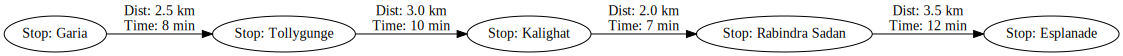

In [4]:
!pip install graphviz

import graphviz

def visualize_bus_route(bus_route_list):
    dot = graphviz.Digraph(comment='Bus Route Linked List', graph_attr={'rankdir': 'LR'})

    current = bus_route_list.head
    node_count = 0

    if not current:
        print("The linked list is empty. No visualization to generate.")
        return dot

    while current:
        node_name = f"node_{node_count}"
        label = f"Stop: {current.stop_name}"
        dot.node(node_name, label=label)

        if current.next:
            next_node_name = f"node_{node_count + 1}"
            edge_label = f"Dist: {current.distance_to_next} km\nTime: {current.time_to_next} min"
            dot.edge(node_name, next_node_name, label=edge_label)

        current = current.next
        node_count += 1

    return dot

# Create a sample BusRouteLinkedList instance to visualize
sample_route = BusRouteLinkedList()
sample_route.append_stop("Garia", 2.5, 8)
sample_route.append_stop("Tollygunge", 3.0, 10)
sample_route.append_stop("Kalighat", 2.0, 7)
sample_route.append_stop("Rabindra Sadan", 3.5, 12)
sample_route.append_stop("Esplanade", 0, 0)

print("Visualizing the sample bus route:")
visualization_graph = visualize_bus_route(sample_route)
visualization_graph

In [5]:
from collections import deque
import time

class MetroQueue:
    def __init__(self):
        self.queue = deque()

    def enqueue_passenger(self, name):
        self.queue.append(name)

    def dequeue_passenger(self, count):
        for _ in range(count):
            if self.queue:
                print(f"Passenger entering metro: {self.queue.popleft()}")
            else:
                print("Queue empty")
                break

    def show_queue(self):
        print("Current queue:", list(self.queue))


# Optional: simple priority queue for senior citizens
class PriorityMetroQueue:
    def __init__(self):
        self.senior = deque()
        self.normal = deque()

    def enqueue_passenger(self, name, is_senior=False):
        if is_senior:
            self.senior.append(name)
        else:
            self.normal.append(name)

    def dequeue_passenger(self, count):
        for _ in range(count):
            if self.senior:
                print(f"Senior passenger entering: {self.senior.popleft()}")
            elif self.normal:
                print(f"Passenger entering: {self.normal.popleft()}")
            else:
                print("Queue empty")
                break

    def show_queue(self):
        print("Senior queue:", list(self.senior))
        print("Normal queue:", list(self.normal))


# Demo for Section B
def demo_queue():
    q = PriorityMetroQueue()
    # Add Bengali names as example
    arrivals = [
        ("Arindam Dutta", False),
        ("Mitali Mondal", False),
        ("Sanjib-Basu", True),
        ("Gopal Naskar", False),
        ("Kakoli Das", False),
        ("Sujata-Ghosh", True),
    ]

    print("Passengers arriving:")
    for name, senior in arrivals:
        q.enqueue_passenger(name, senior)
        q.show_queue()

    # Simulate trains arriving every 3 minutes (here just loop)
    trains = [3, 2, 4]  # capacity each train
    for i, cap in enumerate(trains, start=1):
        print(f"\nTrain {i} arriving with capacity {cap}:")
        q.dequeue_passenger(cap)
        q.show_queue()
        # time.sleep(180)  # real-time, commented for demo
if __name__ == "__main__":
  print("\n=== SECTION B: QUEUE ===")
  demo_queue()


=== SECTION B: QUEUE ===
Passengers arriving:
Senior queue: []
Normal queue: ['Arindam Dutta']
Senior queue: []
Normal queue: ['Arindam Dutta', 'Mitali Mondal']
Senior queue: ['Sanjib-Basu']
Normal queue: ['Arindam Dutta', 'Mitali Mondal']
Senior queue: ['Sanjib-Basu']
Normal queue: ['Arindam Dutta', 'Mitali Mondal', 'Gopal Naskar']
Senior queue: ['Sanjib-Basu']
Normal queue: ['Arindam Dutta', 'Mitali Mondal', 'Gopal Naskar', 'Kakoli Das']
Senior queue: ['Sanjib-Basu', 'Sujata-Ghosh']
Normal queue: ['Arindam Dutta', 'Mitali Mondal', 'Gopal Naskar', 'Kakoli Das']

Train 1 arriving with capacity 3:
Senior passenger entering: Sanjib-Basu
Senior passenger entering: Sujata-Ghosh
Passenger entering: Arindam Dutta
Senior queue: []
Normal queue: ['Mitali Mondal', 'Gopal Naskar', 'Kakoli Das']

Train 2 arriving with capacity 2:
Passenger entering: Mitali Mondal
Passenger entering: Gopal Naskar
Senior queue: []
Normal queue: ['Kakoli Das']

Train 3 arriving with capacity 4:
Passenger entering: 

Visualizing the sample priority metro queue:


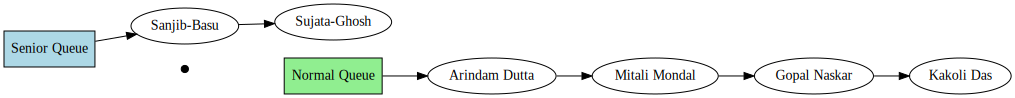

In [6]:
import graphviz

def visualize_metro_queue(priority_queue):
    dot = graphviz.Digraph(comment='Metro Priority Queue', graph_attr={'rankdir': 'LR'})

    # Visualize Senior Queue
    if priority_queue.senior:
        dot.node('senior_label', 'Senior Queue', shape='box', style='filled', fillcolor='lightblue')
        current_node_id = 'senior_label'
        for i, passenger in enumerate(priority_queue.senior):
            node_name = f"senior_{i}"
            dot.node(node_name, passenger)
            dot.edge(current_node_id, node_name)
            current_node_id = node_name
    else:
        dot.node('senior_empty_label', 'Senior Queue (Empty)', shape='box', style='filled', fillcolor='lightgray')

    # Add a separator if both queues exist
    if priority_queue.senior and priority_queue.normal:
        dot.node('separator', '', width='0.1', height='0.1', shape='point', style='invisible')
        dot.edge('senior_label', 'separator', style='invis')
        dot.edge('separator', 'normal_label', style='invis')

    # Visualize Normal Queue
    if priority_queue.normal:
        dot.node('normal_label', 'Normal Queue', shape='box', style='filled', fillcolor='lightgreen')
        current_node_id = 'normal_label'
        for i, passenger in enumerate(priority_queue.normal):
            node_name = f"normal_{i}"
            dot.node(node_name, passenger)
            dot.edge(current_node_id, node_name)
            current_node_id = node_name
    else:
        dot.node('normal_empty_label', 'Normal Queue (Empty)', shape='box', style='filled', fillcolor='lightgray')

    return dot

# Create a sample PriorityMetroQueue instance and populate it
sample_priority_queue = PriorityMetroQueue()
sample_priority_queue.enqueue_passenger("Arindam Dutta", False)
sample_priority_queue.enqueue_passenger("Mitali Mondal", False)
sample_priority_queue.enqueue_passenger("Sanjib-Basu", True)
sample_priority_queue.enqueue_passenger("Gopal Naskar", False)
sample_priority_queue.enqueue_passenger("Kakoli Das", False)
sample_priority_queue.enqueue_passenger("Sujata-Ghosh", True)

print("Visualizing the sample priority metro queue:")
visualization_graph_queue = visualize_metro_queue(sample_priority_queue)
visualization_graph_queue

In [9]:
class RechargeRecord:
    def __init__(self, amount, timestamp, mode):
        self.amount = amount
        self.timestamp = timestamp
        self.mode = mode  # e.g., "App", "Counter", "Smart Card Machine"

    def __repr__(self):
        return f"{self.timestamp} | Rs {self.amount} | {self.mode}"


class RechargeStack:
    def __init__(self):
        self.stack = []

    def push_recharge(self, record):
        self.stack.append(record)

    def undo_last_recharge(self):
        if not self.stack:
            print("No recharge to undo")
            return None
        last = self.stack.pop()
        print("Undoing recharge:", last)
        return last

    def show_last_five(self):
        print("Last 5 recharge operations (top to bottom):")
        for rec in self.stack[-1:-6:-1]:
            print(rec)

    def last_needs_correction(self, expected_amount):
        if not self.stack:
            print("No recharge records")
            return False
        last = self.stack[-1]
        if last.amount != expected_amount:
            print("Last recharge may need correction:", last)
            return True
        print("Last recharge seems correct:", last)
        return False


# Demo for Section C
from datetime import datetime

def demo_stack():
    s = RechargeStack()
    s.push_recharge(RechargeRecord(200, datetime.now().strftime("%Y-%m-%d %H:%M"), "App"))
    s.push_recharge(RechargeRecord(100, datetime.now().strftime("%Y-%m-%d %H:%M"), "Counter"))
    s.push_recharge(RechargeRecord(300, datetime.now().strftime("%Y-%m-%d %H:%M"), "App"))
    s.push_recharge(RechargeRecord(150, datetime.now().strftime("%Y-%m-%d %H:%M"), "Smart Card Machine"))
    s.push_recharge(RechargeRecord(150, datetime.now().strftime("%Y-%m-%d %H:%M"), "Smart Card Machine"))
    s.push_recharge(RechargeRecord(500, datetime.now().strftime("%Y-%m-%d %H:%M"), "App"))

    s.show_last_five()
    s.last_needs_correction(expected_amount=100)  # sample check
    s.undo_last_recharge()
if __name__ == "__main__":
  print("\n=== SECTION C: STACK ===")
  demo_stack()


=== SECTION C: STACK ===
Last 5 recharge operations (top to bottom):
2025-12-05 07:00 | Rs 500 | App
2025-12-05 07:00 | Rs 150 | Smart Card Machine
2025-12-05 07:00 | Rs 150 | Smart Card Machine
2025-12-05 07:00 | Rs 300 | App
2025-12-05 07:00 | Rs 100 | Counter
Last recharge may need correction: 2025-12-05 07:00 | Rs 500 | App
Undoing recharge: 2025-12-05 07:00 | Rs 500 | App


Visualizing the sample recharge stack:


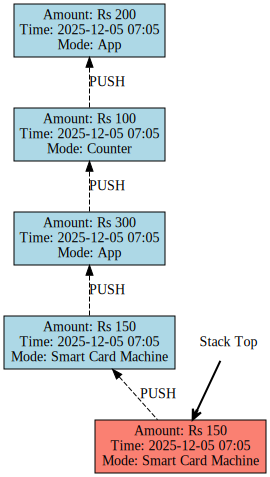

In [11]:
import graphviz
from datetime import datetime

def visualize_recharge_stack(recharge_stack):
    dot = graphviz.Digraph(comment='Recharge Stack', graph_attr={'rankdir': 'TB'}) # Top to Bottom for stack visualization

    if not recharge_stack.stack:
        dot.node('empty', 'Stack (Empty)', shape='box', style='filled', fillcolor='lightgray')
        print("The stack is empty. No visualization to generate.")
        return dot

    # Iterate through the stack from bottom to top to draw nodes in order
    # The last element in the list is the top of the stack
    for i, record in enumerate(recharge_stack.stack):
        node_name = f"rec_{i}"
        label = f"Amount: Rs {record.amount}\nTime: {record.timestamp}\nMode: {record.mode}"
        fillcolor = 'salmon' if i == len(recharge_stack.stack) - 1 else 'lightblue' # Highlight the top element
        dot.node(node_name, label=label, shape='box', style='filled', fillcolor=fillcolor)

        if i > 0:
            # Draw edge from previous element to current (representing stack order)
            dot.edge(f"rec_{i-1}", node_name, dir='back', label='PUSH', style='dashed', arrowhead='none') # Indicate push direction

    # Add a label for the top of the stack
    dot.node('stack_top_label', 'Stack Top', shape='none')
    dot.edge('stack_top_label', f"rec_{len(recharge_stack.stack) - 1}", arrowhead='open', style='bold')

    return dot

# Create a sample RechargeStack instance and populate it
sample_recharge_stack = RechargeStack()
sample_recharge_stack.push_recharge(RechargeRecord(200, datetime.now().strftime("%Y-%m-%d %H:%M"), "App"))
sample_recharge_stack.push_recharge(RechargeRecord(100, datetime.now().strftime("%Y-%m-%d %H:%M"), "Counter"))
sample_recharge_stack.push_recharge(RechargeRecord(300, datetime.now().strftime("%Y-%m-%d %H:%M"), "App"))
sample_recharge_stack.push_recharge(RechargeRecord(150, datetime.now().strftime("%Y-%m-%d %H:%M"), "Smart Card Machine"))
sample_recharge_stack.push_recharge(RechargeRecord(150, datetime.now().strftime("%Y-%m-%d %H:%M"), "Smart Card Machine"))

print("Visualizing the sample recharge stack:")
visualization_graph_stack = visualize_recharge_stack(sample_recharge_stack)
visualization_graph_stack

In [12]:
class BusScheduleEntry:
    def __init__(self, route_no, first_trip, last_trip, frequency_min):
        self.route_no = route_no
        self.first_trip = first_trip
        self.last_trip = last_trip
        self.frequency_min = frequency_min

    def __repr__(self):
        return f"{self.route_no}: {self.first_trip}-{self.last_trip}, every {self.frequency_min} min"


class HashTable:
    def __init__(self, size=17):
        self.size = size
        self.buckets = [[] for _ in range(size)]  # chaining

    def _hash(self, key):
        # simple hash on string
        return sum(ord(c) for c in key) % self.size

    def insert(self, entry: BusScheduleEntry):
        idx = self._hash(entry.route_no)
        bucket = self.buckets[idx]
        for i, e in enumerate(bucket):
            if e.route_no == entry.route_no:
                bucket[i] = entry  # update
                return
        bucket.append(entry)

    def search(self, route_no):
        idx = self._hash(route_no)
        bucket = self.buckets[idx]
        for e in bucket:
            if e.route_no == route_no:
                return e
        return None

    def delete(self, route_no):
        idx = self._hash(route_no)
        bucket = self.buckets[idx]
        for i, e in enumerate(bucket):
            if e.route_no == route_no:
                bucket.pop(i)
                return True
        return False

    def display(self):
        for i, bucket in enumerate(self.buckets):
            print(f"Bucket {i}:", bucket)


# Demo for Section D
def demo_hash_table():
    ht = HashTable()

    entries = [
        BusScheduleEntry("12C/1B", "06:00", "22:00", 10),
        BusScheduleEntry("215A", "05:30", "21:30", 12),
        BusScheduleEntry("S9", "06:15", "22:15", 15),
        BusScheduleEntry("AC12", "07:00", "21:00", 20),
        BusScheduleEntry("47B", "05:45", "22:30", 8),
        BusScheduleEntry("5", "06:10", "21:50", 10),
        BusScheduleEntry("3C/2", "06:20", "22:10", 12),
        BusScheduleEntry("S12A", "05:40", "22:05", 14),
        BusScheduleEntry("3A", "06:05", "21:40", 11),
        BusScheduleEntry("S1", "05:50", "22:20", 9),
        BusScheduleEntry("S5", "06:25", "22:35", 13),
        BusScheduleEntry("VS1", "07:10", "21:30", 18),
    ]

    for e in entries:
        ht.insert(e)

    print("Hash table buckets (show collisions via chaining):")
    ht.display()

    print("\nSearch route 215A:")
    print(ht.search("215A"))

    print("\nUpdate 215A timing and re-insert:")
    ht.insert(BusScheduleEntry("215A", "05:00", "22:00", 10))
    print(ht.search("215A"))

    print("\nDelete route 5:")
    ht.delete("5")
    print("Search route 5:", ht.search("5"))
if __name__ == "__main__":
  print("\n=== SECTION D: HASH TABLE ===")
  demo_hash_table()


=== SECTION D: HASH TABLE ===
Hash table buckets (show collisions via chaining):
Bucket 0: [S5: 06:25-22:35, every 13 min]
Bucket 1: []
Bucket 2: [5: 06:10-21:50, every 10 min]
Bucket 3: [47B: 05:45-22:30, every 8 min]
Bucket 4: [S9: 06:15-22:15, every 15 min]
Bucket 5: [12C/1B: 06:00-22:00, every 10 min]
Bucket 6: []
Bucket 7: []
Bucket 8: []
Bucket 9: [S12A: 05:40-22:05, every 14 min]
Bucket 10: [AC12: 07:00-21:00, every 20 min]
Bucket 11: [3C/2: 06:20-22:10, every 12 min]
Bucket 12: []
Bucket 13: [215A: 05:30-21:30, every 12 min, S1: 05:50-22:20, every 9 min]
Bucket 14: [3A: 06:05-21:40, every 11 min, VS1: 07:10-21:30, every 18 min]
Bucket 15: []
Bucket 16: []

Search route 215A:
215A: 05:30-21:30, every 12 min

Update 215A timing and re-insert:
215A: 05:00-22:00, every 10 min

Delete route 5:
Search route 5: None


Visualizing the sample hash table:


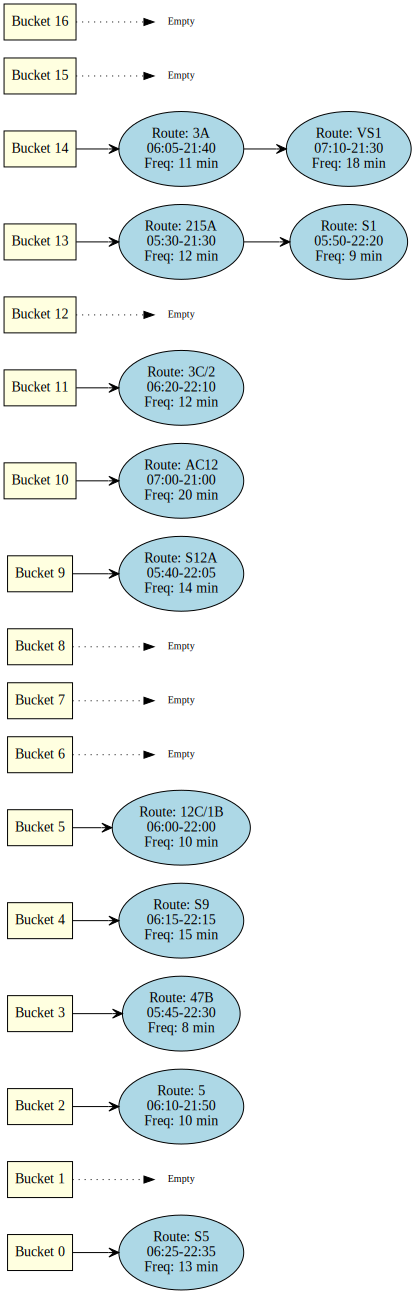

In [13]:
import graphviz

def visualize_hash_table(hash_table):
    dot = graphviz.Digraph(comment='Bus Schedule Hash Table', graph_attr={'rankdir': 'LR'})

    # Create nodes for buckets
    for i in range(hash_table.size):
        bucket_label = f"Bucket {i}"
        dot.node(f"bucket_{i}", bucket_label, shape='box', style='filled', fillcolor='lightyellow')

        # Add entries within each bucket
        if hash_table.buckets[i]:
            prev_node_id = f"bucket_{i}"
            for j, entry in enumerate(hash_table.buckets[i]):
                entry_node_id = f"entry_{i}_{j}"
                entry_label = f"Route: {entry.route_no}\n{entry.first_trip}-{entry.last_trip}\nFreq: {entry.frequency_min} min"
                dot.node(entry_node_id, entry_label, shape='ellipse', style='filled', fillcolor='lightblue')
                dot.edge(prev_node_id, entry_node_id, dir='forward', arrowhead='open')
                prev_node_id = entry_node_id
        else:
            # Add an 'empty' node for empty buckets to make them visible
            empty_node_id = f"empty_{i}"
            dot.node(empty_node_id, 'Empty', shape='plaintext', fontsize='10')
            dot.edge(f"bucket_{i}", empty_node_id, style='dotted')
    return dot

# Create a sample HashTable instance and populate it
sample_hash_table = HashTable()

entries = [
    BusScheduleEntry("12C/1B", "06:00", "22:00", 10),
    BusScheduleEntry("215A", "05:30", "21:30", 12),
    BusScheduleEntry("S9", "06:15", "22:15", 15),
    BusScheduleEntry("AC12", "07:00", "21:00", 20),
    BusScheduleEntry("47B", "05:45", "22:30", 8),
    BusScheduleEntry("5", "06:10", "21:50", 10),
    BusScheduleEntry("3C/2", "06:20", "22:10", 12),
    BusScheduleEntry("S12A", "05:40", "22:05", 14),
    BusScheduleEntry("3A", "06:05", "21:40", 11),
    BusScheduleEntry("S1", "05:50", "22:20", 9),
    BusScheduleEntry("S5", "06:25", "22:35", 13),
    BusScheduleEntry("VS1", "07:10", "21:30", 18),
]

for e in entries:
    sample_hash_table.insert(e)

print("Visualizing the sample hash table:")
visualization_graph_hash_table = visualize_hash_table(sample_hash_table)
visualization_graph_hash_table

In [14]:
class BSTNode:
    def __init__(self, route_no):
        self.route_no = route_no
        self.left = None
        self.right = None


class RouteBST:
    def __init__(self):
        self.root = None

    def insert(self, route_no):
        self.root = self._insert(self.root, route_no)

    def _insert(self, node, route_no):
        if not node:
            return BSTNode(route_no)
        if route_no < node.route_no:
            node.left = self._insert(node.left, route_no)
        elif route_no > node.route_no:
            node.right = self._insert(node.right, route_no)
        return node

    def search(self, route_no):
        return self._search(self.root, route_no)

    def _search(self, node, route_no):
        if not node or node.route_no == route_no:
            return node
        if route_no < node.route_no:
            return self._search(node.left, route_no)
        else:
            return self._search(node.right, route_no)

    def delete(self, route_no):
        self.root = self._delete(self.root, route_no)

    def _delete(self, node, route_no):
        if not node:
            return None
        if route_no < node.route_no:
            node.left = self._delete(node.left, route_no)
        elif route_no > node.route_no:
            node.right = self._delete(node.right, route_no)
        else:
            # node to be deleted
            if not node.left:
                return node.right
            if not node.right:
                return node.left
            # two children: get inorder successor
            succ = self._min_value_node(node.right)
            node.route_no = succ.route_no
            node.right = self._delete(node.right, succ.route_no)
        return node

    def _min_value_node(self, node):
        curr = node
        while curr.left:
            curr = curr.left
        return curr

    def inorder(self):
        result = []
        self._inorder(self.root, result)
        return result

    def _inorder(self, node, result):
        if not node:
            return
        self._inorder(node.left, result)
        result.append(node.route_no)
        self._inorder(node.right, result)

    def height(self):
        return self._height(self.root)

    def _height(self, node):
        if not node:
            return 0
        return 1 + max(self._height(node.left), self._height(node.right))


# Demo for Section E
def demo_bst():
    bst = RouteBST()
    routes = ["3A", "3C/2", "215A", "47B", "S9", "S12A", "5", "12C/1B"]

    for r in routes:
        bst.insert(r)

    print("Inorder traversal (sorted routes):")
    print(bst.inorder())

    print("Height of tree:", bst.height())

    print("Search for S9:", "Found" if bst.search("S9") else "Not found")
    print("Delete 47B")
    bst.delete("47B")
    print("Inorder after deletion:")
    print(bst.inorder())
if __name__ == "__main__":
  print("\n=== SECTION E: BST ===")
  demo_bst()


=== SECTION E: BST ===
Inorder traversal (sorted routes):
['12C/1B', '215A', '3A', '3C/2', '47B', '5', 'S12A', 'S9']
Height of tree: 6
Search for S9: Found
Delete 47B
Inorder after deletion:
['12C/1B', '215A', '3A', '3C/2', '5', 'S12A', 'S9']


Visualizing the sample Binary Search Tree:


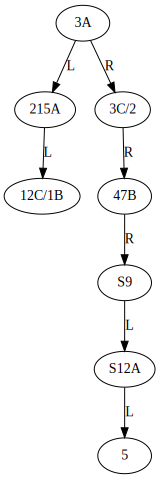

In [15]:
import graphviz

def visualize_bst(bst):
    dot = graphviz.Digraph(comment='Route BST', graph_attr={'rankdir': 'TB'}) # Top to Bottom for tree visualization

    def add_nodes_edges(node):
        if node:
            dot.node(str(node.route_no), str(node.route_no))
            if node.left:
                dot.edge(str(node.route_no), str(node.left.route_no), label='L')
                add_nodes_edges(node.left)
            if node.right:
                dot.edge(str(node.route_no), str(node.right.route_no), label='R')
                add_nodes_edges(node.right)

    if not bst.root:
        dot.node('empty', 'BST (Empty)', shape='box', style='filled', fillcolor='lightgray')
        print("The BST is empty. No visualization to generate.")
        return dot

    add_nodes_edges(bst.root)
    return dot

# Create a sample RouteBST instance and populate it
sample_bst = RouteBST()
routes = ["3A", "3C/2", "215A", "47B", "S9", "S12A", "5", "12C/1B"]

for r in routes:
    sample_bst.insert(r)

print("Visualizing the sample Binary Search Tree:")
visualization_graph_bst = visualize_bst(sample_bst)
visualization_graph_bst